In [1]:
import pandas as pd
import numpy as np

### Diagrama circular con los años de publicación
<p> Para este necesito 2 graficos pero 1 de cada archivo, fijarse de que los años esten consecutivos para mantener un orden y que sea el total de archivos correspondiente (columna "Publication Year") </p>


In [2]:
# cargo dataframe1 3db
dfCommon3db= pd.read_csv("common_articles_3db.csv")

In [3]:
# cargo dataframe2 db
dfCommon = pd.read_csv("common_articles.csv") 

In [4]:
# veré las dimensiones de los dataframes

print(f"dfCommon.shape: {dfCommon.shape}")
print(f"dfCommon3db.shape: {dfCommon3db.shape}")

dfCommon.shape: (920, 15)
dfCommon3db.shape: (25, 15)


In [5]:
# veré las columnas de los dataframes

print(f"dfCommon.columns: {dfCommon.columns}")
print(f"dfCommon3db.columns: {dfCommon3db.columns}")

dfCommon.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado'],
      dtype='object')
dfCommon3db.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado inicial'],
      dtype='object')


In [6]:
# veré los registros de la columna 'Publication Year' de los dataframes

print(f"dfCommon['Publication Year']: {dfCommon['Publication Year']}")
print(f"dfCommon3db['Publication Year']: {dfCommon3db['Publication Year']}")

dfCommon['Publication Year']: 0      2021
1      2024
2      2016
3      2023
4      2018
       ... 
915    2024
916    2022
917    2019
918    2021
919    2019
Name: Publication Year, Length: 920, dtype: int64
dfCommon3db['Publication Year']: 0     2021
1     2023
2     2021
3     2021
4     2024
5     2021
6     2023
7     2023
8     2024
9     2021
10    2022
11    2022
12    2018
13    2023
14    2022
15    2022
16    2023
17    2023
18    2022
19    2022
20    2024
21    2020
22    2023
23    2022
24    2023
Name: Publication Year, dtype: int64


In [7]:
print(f"dfCommon['Publication Year']: {dfCommon['Publication Year'].value_counts()}")

print("##############################################")

print(f"dfCommon3db['Publication Year']: {dfCommon3db['Publication Year'].value_counts()}") 

dfCommon['Publication Year']: Publication Year
2024    183
2023    168
2022    123
2021    118
2019     99
2020     87
2018     48
2017     41
2016     28
2015     24
2025      1
Name: count, dtype: int64
##############################################
dfCommon3db['Publication Year']: Publication Year
2023    8
2022    7
2021    5
2024    3
2018    1
2020    1
Name: count, dtype: int64


In [8]:
# ordeno los dataframes por 'Publication Year' con sorted

dfCommonSortedByYears = dfCommon['Publication Year'].value_counts().sort_index()

print(f"dfCommonSortedByYears: {dfCommonSortedByYears}")

dfCommon3dbSortedByYears = dfCommon3db['Publication Year'].value_counts().sort_index()

dfCommonSortedByYears: Publication Year
2015     24
2016     28
2017     41
2018     48
2019     99
2020     87
2021    118
2022    123
2023    168
2024    183
2025      1
Name: count, dtype: int64


In [9]:
print(dfCommonSortedByYears.dtypes)  # Debería mostrar int o float


int64


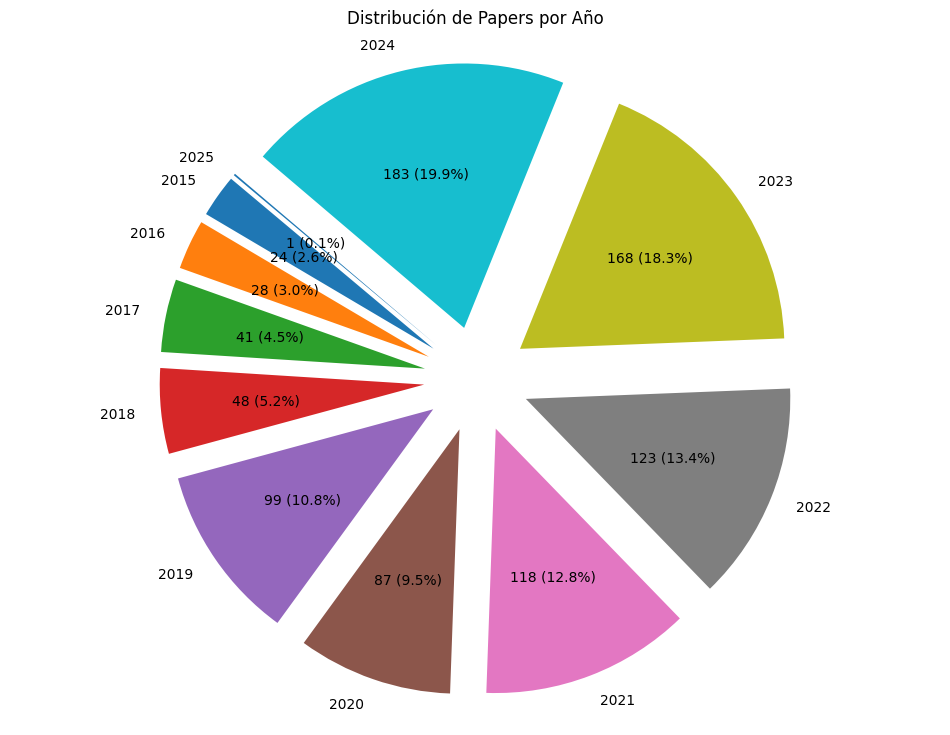

In [10]:
import matplotlib.pyplot as plt

# gráficos de torta por año

# Crear una función para mostrar tanto el número de papers como el porcentaje dentro del gráfico
def func(pct, allvals):
    absolute = int(round(pct/100. * sum(allvals)))
    return f'{absolute} ({pct:.1f}%)'

# Crear el gráfico de torta
explode = [0.2] * len(dfCommonSortedByYears)  # Resaltar todos los segmentos
plt.figure(figsize=(12, 9))
plt.pie(dfCommonSortedByYears, labels=dfCommonSortedByYears.index, 
        autopct=lambda pct: func(pct, dfCommonSortedByYears), startangle=140, explode=explode)
plt.title('Distribución de Papers por Año')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

👁️! <h2 style="color:red">Sucede que el 2025 al ser tan pequeño el label de ese queda horrible por eso separé los pedacitos de pastel xd</h1>

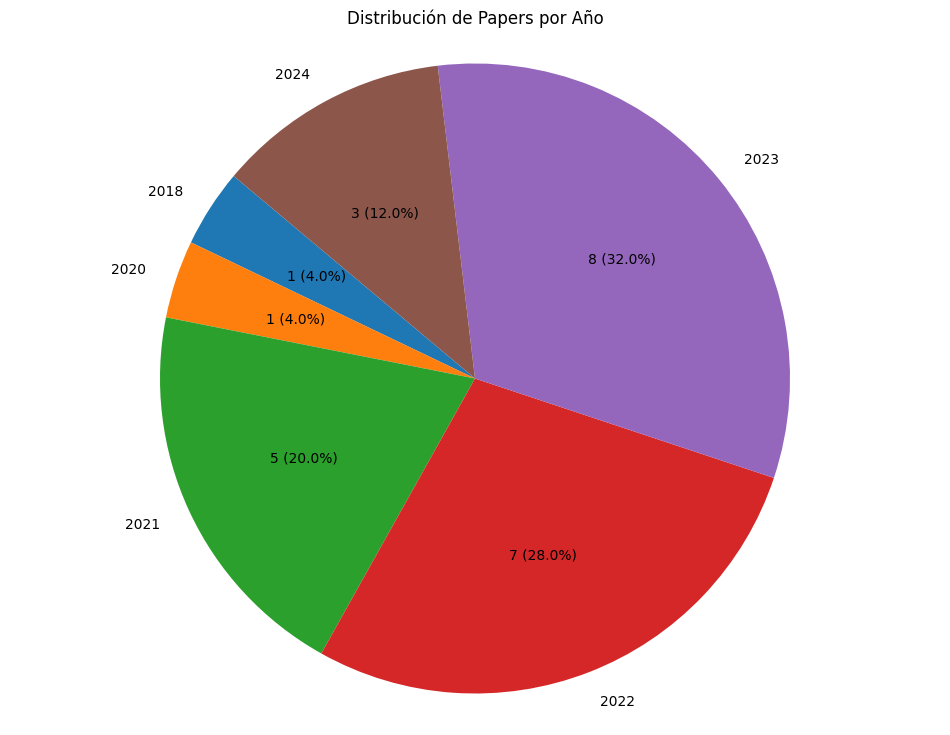

In [11]:
import matplotlib.pyplot as plt

# gráficos de torta por año

# Crear una función para mostrar tanto el número de papers como el porcentaje dentro del gráfico
def func(pct, allvals):
    absolute = int(round(pct/100. * sum(allvals)))
    return f'{absolute} ({pct:.1f}%)'

plt.figure(figsize=(12, 9))
plt.pie(dfCommon3dbSortedByYears, labels=dfCommon3dbSortedByYears.index, 
        autopct=lambda pct: func(pct, dfCommon3dbSortedByYears), startangle=140)
plt.title('Distribución de Papers por Año')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

<p style="color:red">PRECAUCION :x: a partir de aquí hay que omitir los artículos que en la columna "Estado inicial" digan "Excluido" o "Excluido, no esta en sci-hub" y solo se usara el archivo "common_articles in 3db"</p>

In [12]:
# excluir los articulos que en la columna 'Estado inicial de la publicación' tengan 'excluido'  o 'excluido, no está en sci-hub'

# print de las columnas de los dataframes

print(f"dfCommon3db.columns: {dfCommon3db.columns}")


dfCommon3db.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado inicial'],
      dtype='object')


In [13]:
# imprimir los valores de la columna 'Estado inicial de la publicación'

print(f"dfCommon['Estado inicial de la publicación']: {dfCommon3db['Estado inicial']}")

dfCommon['Estado inicial de la publicación']: 0     Excluido, no esta en sci-hub
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
10                             NaN
11                             NaN
12                             NaN
13                             NaN
14                             NaN
15                             NaN
16                             NaN
17                             NaN
18                             NaN
19                             NaN
20    Excluido, no esta en sci-hub
21                             NaN
22                             NaN
23    Excluido, no esta en sci-hub
24                             NaN
Name: Estado inicial, dtype: object


In [14]:
dfCommon3db['Estado inicial'].value_counts()

Estado inicial
Excluido, no esta en sci-hub    3
Name: count, dtype: int64

In [15]:
dfCommon3db = dfCommon3db[dfCommon3db['Estado inicial'].isna()]

In [16]:
print (dfCommon3db['Estado inicial'])

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
21    NaN
22    NaN
24    NaN
Name: Estado inicial, dtype: object


In [17]:
dfCommon3db.shape

(22, 15)

In [18]:
dfAux = pd.read_csv("common_articles_3db.csv")
dfAux.shape

(25, 15)

Ahí excluí los 3 articulos feos!

## Gráfico de barras de grupos de estudios
1 grafico de barras, ojala con los campos de población ordenados alfabéticamente (columna "Población estudiada")


In [19]:
# listar los datos de la columna población estudiada 

dfCommon3db['Población estudiada'].value_counts()

Población estudiada
adolescentes con anorexia nerviosa (AN) y sanos (12 y 20 años)                    1
niños (4 a 15 años) con Trastorno del Espectro Autista (TEA)                      1
adolescentes (13-18 años )                                                        1
niños (0-6 años)                                                                  1
bebés, niños en edad preescolar y escolar, adolescentes y adultos jóvenes         1
niños y adolescentes (5-18 años)                                                  1
niños con Síndrome de Down                                                        1
población japonesa                                                                1
Mujeres                                                                           1
adolescentes (15-25 años)                                                         1
niños con afecciones del desarrollo y del comportamiento                          1
niños, adolescentes y adultos jóvenes con trastorno del 

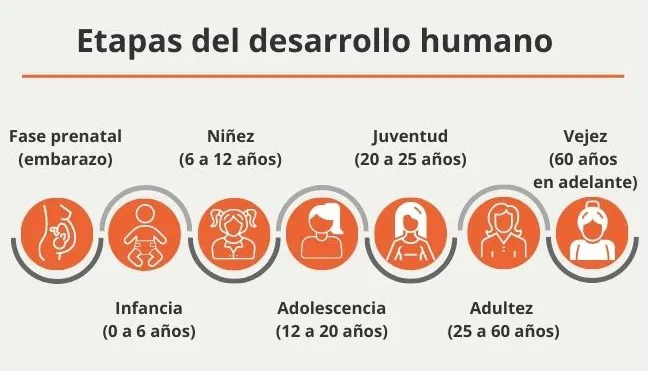

In [20]:
# Clasificación según las categorías mencionadas

infancia = [
    "niños (4 a 15 años) con Trastorno del Espectro Autista (TEA)",
    "niños (0-6 años)",
    "niños con Síndrome de Down",
    "niños (7-10 años)",
    "niños (3 años)",
    "niños en edad preescolar",
    "niños (5 años)",
    "niños (2-8 años)",
    "niños con autismo",
    "niños (5-18 años)"
]

adolescencia = [
    "adolescentes con anorexia nerviosa (AN) y sanos (12 y 20 años)",
    "adolescentes (13-18 años)",
    "adolescentes (15-25 años)",
    "adolescentes (10-24 años) diagnosticados con trastornos del estado de ánimo",
    "adolescentes (13-19 años)",
    "adolescentes (15-25 años)",
    "adolescentes (13-19 años) con trastorno del espectro autista (TEA)"
]

juventud = [
    "bebés, niños en edad preescolar y escolar, adolescentes y adultos jóvenes",
    "niños y adolescentes (5-18 años)",
    "niños y adolescentes",
    "niños y adolescentes (menores de 18 años)"
]

adultez = [
    "Mujeres",
]

vejez = []

otra_categoria = [
    "población japonesa"
]

# Patologías
niños_con_patologias = [
    "niños con afecciones del desarrollo y del comportamiento",
    "niños con autismo",
]

adolescentes_con_patologias = [
    "adolescentes con anorexia nerviosa (AN) y sanos (12 y 20 años)",
    "adolescentes (10-24 años) diagnosticados con trastornos del estado de ánimo",
    "adolescentes (13-19 años) con trastorno del espectro autista (TEA)"
]

# Impresión de cada categoría
print("Infancia:", infancia)
print("Adolescencia:", adolescencia)
print("Juventud:", juventud)
print("Adultez:", adultez)
print("Vejez:", vejez)
print("Otra categoría (población japonesa):", otra_categoria)
print("Niños con patologías:", niños_con_patologias)
print("Adolescentes con patologías:", adolescentes_con_patologias)


Infancia: ['niños (4 a 15 años) con Trastorno del Espectro Autista (TEA)', 'niños (0-6 años)', 'niños con Síndrome de Down', 'niños (7-10 años)', 'niños (3 años)', 'niños en edad preescolar', 'niños (5 años)', 'niños (2-8 años)', 'niños con autismo', 'niños (5-18 años)']
Adolescencia: ['adolescentes con anorexia nerviosa (AN) y sanos (12 y 20 años)', 'adolescentes (13-18 años)', 'adolescentes (15-25 años)', 'adolescentes (10-24 años) diagnosticados con trastornos del estado de ánimo', 'adolescentes (13-19 años)', 'adolescentes (15-25 años)', 'adolescentes (13-19 años) con trastorno del espectro autista (TEA)']
Juventud: ['bebés, niños en edad preescolar y escolar, adolescentes y adultos jóvenes', 'niños y adolescentes (5-18 años)', 'niños y adolescentes', 'niños y adolescentes (menores de 18 años)']
Adultez: ['Mujeres']
Vejez: []
Otra categoría (población japonesa): ['población japonesa']
Niños con patologías: ['niños con afecciones del desarrollo y del comportamiento', 'niños con auti

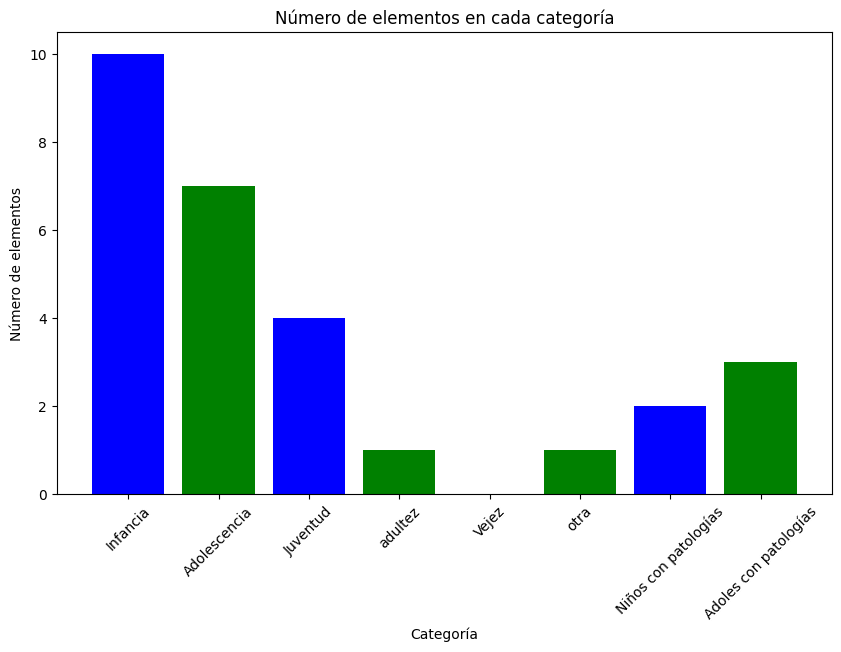

In [21]:

# Crear diccionario con las listas y sus nombres
categories = {
    "Infancia": infancia,
    "Adolescencia": adolescencia,
    "Juventud": juventud,
    "adultez": adultez,
    "Vejez": vejez, 
    "otra": otra_categoria,
    "Niños con patologías": niños_con_patologias,
    "Adoles con patologías": adolescentes_con_patologias
}

labels = []
counts = []

for category, items in categories.items():
    labels.append(category)
    counts.append(len(items))  # Contar elementos en cada lista

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Número de elementos en cada categoría')
plt.xticks(rotation=45)
plt.xlabel('Categoría')
plt.ylabel('Número de elementos')
plt.show()


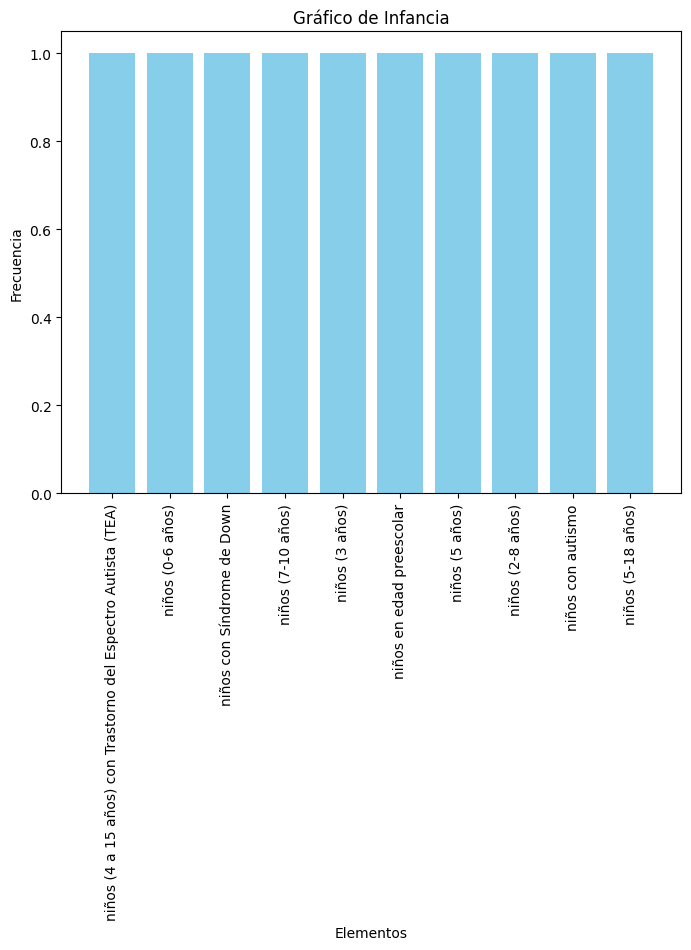

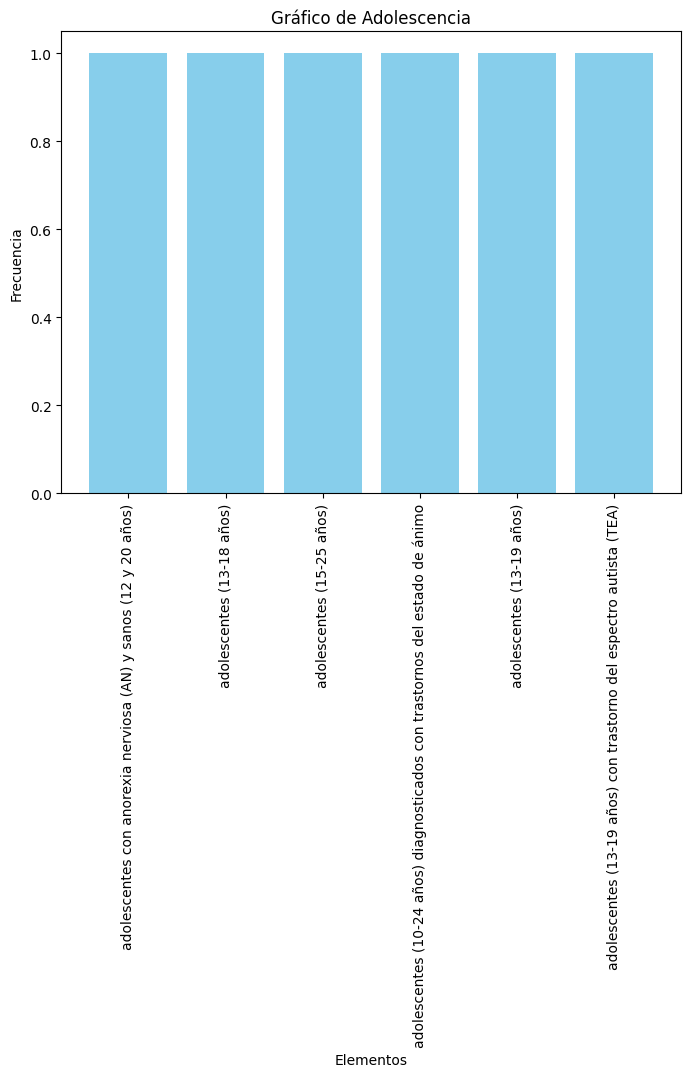

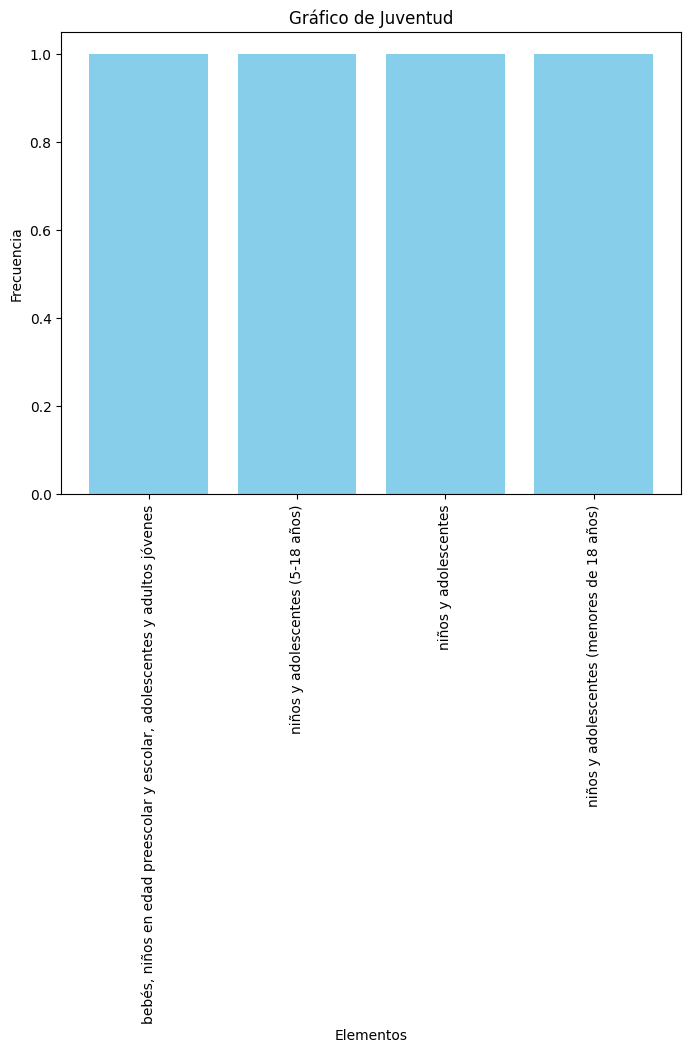

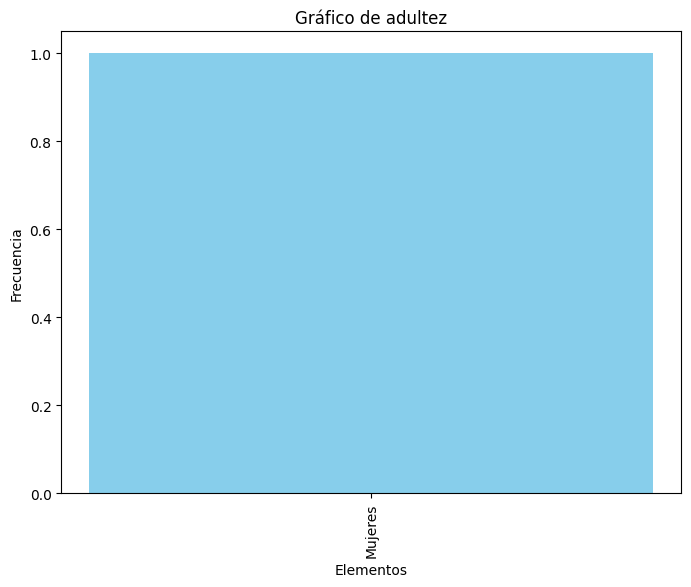

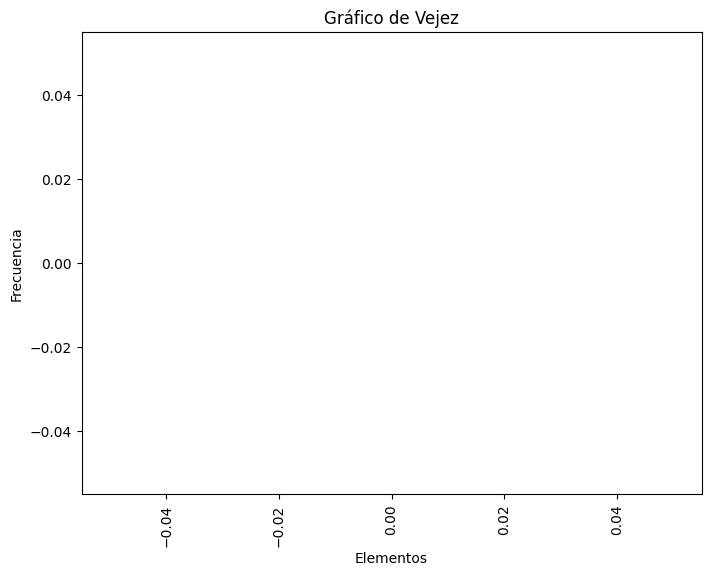

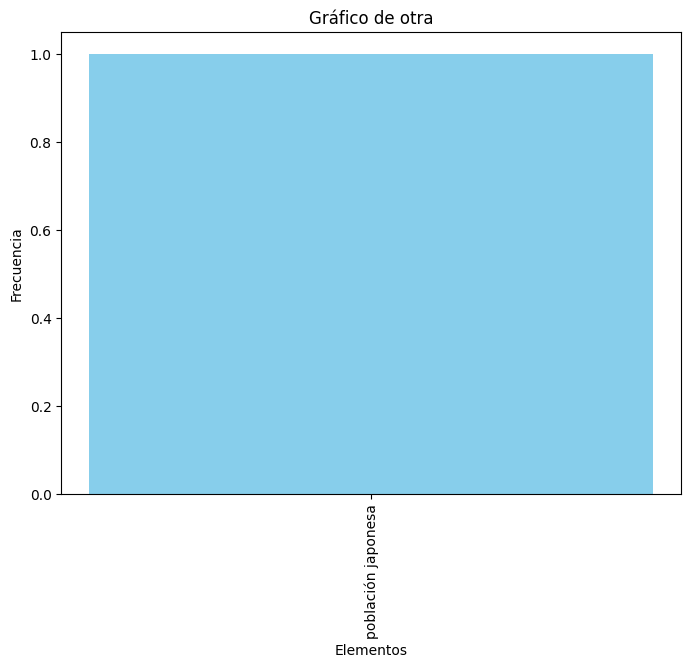

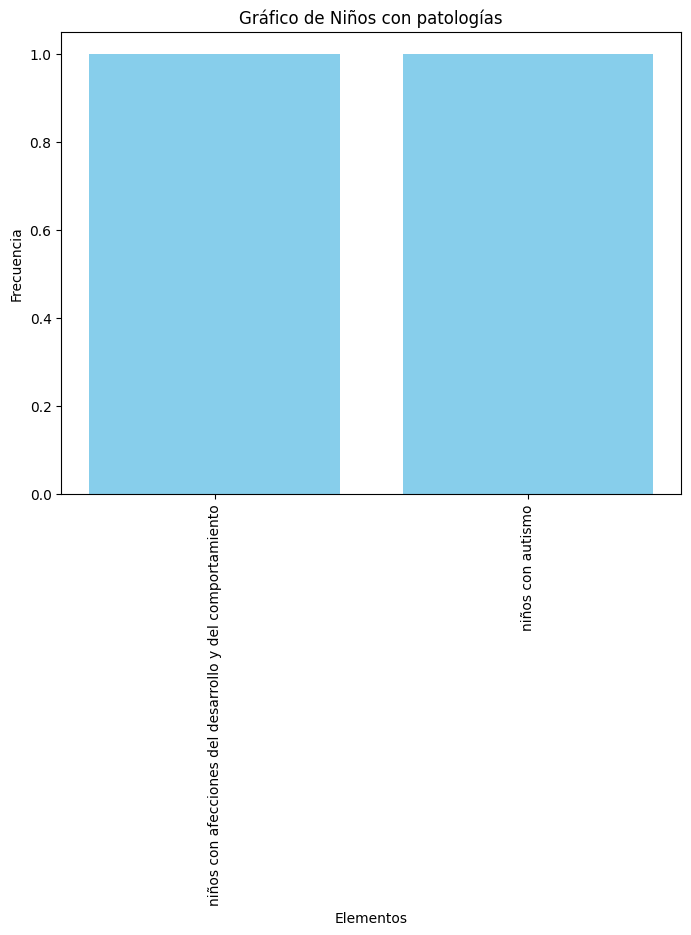

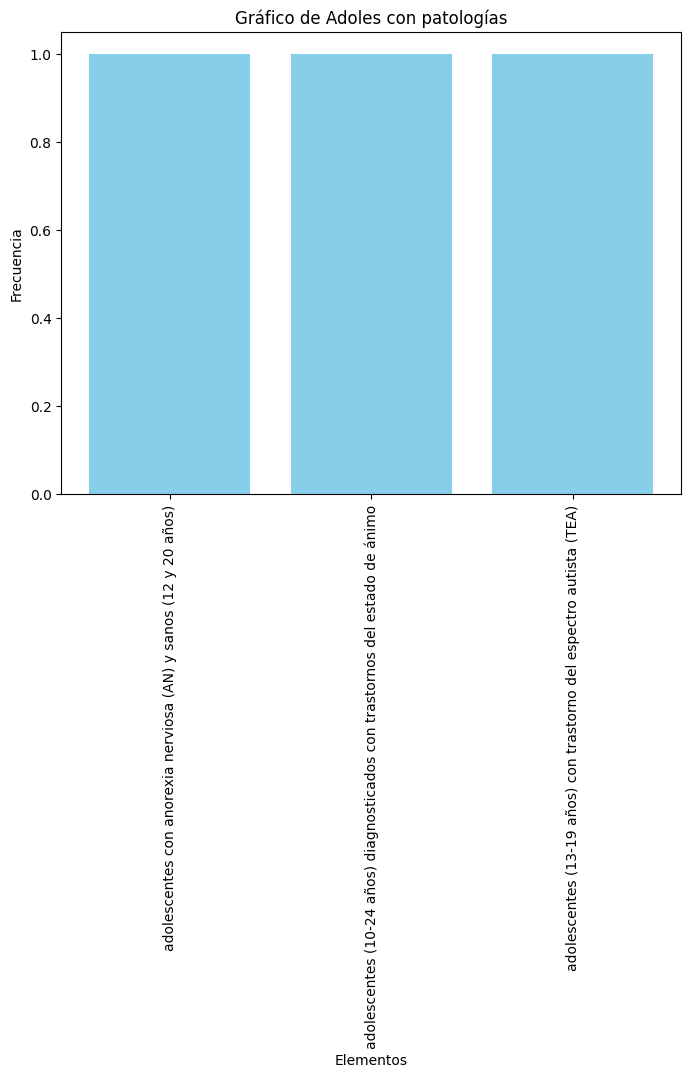

In [22]:
# Crear un gráfico separado para cada lista
for category, items in categories.items():
    plt.figure(figsize=(8, 6))
    plt.bar(items, [1] * len(items), color='skyblue')  # Cada barra tiene un valor de 1
    plt.title(f'Gráfico de {category}')
    plt.xlabel('Elementos')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)  # Rotar etiquetas para que no se sobrepongan
    plt.show()

## grafico de barras de herramientas de calculo usadas
1 grafico de barras, ojala con los campos de población ordenados alfabéticamente (columna "Método de DL usado")

In [23]:
# Crear un gráfico de barras con todos los métodos de DL usados

print(f"dfCommon3db.columns: {dfCommon3db.columns}")

dfCommon3db.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado inicial'],
      dtype='object')


In [24]:
print(f"dfCommon3db['Métodos de DL usados']: {dfCommon3db['Método de DL usado'].value_counts()}")
# Generar el DataFrame con los métodos y sus frecuencias
df_metodos = dfCommon3db['Método de DL usado'].value_counts().reset_index()
df_metodos.columns = ['Método de DL usado', 'Frecuencia']

# Mostrar el DataFrame resultante
print(df_metodos)

dfCommon3db['Métodos de DL usados']: Método de DL usado
No especifica                                                     3
CNN                                                               3
No reporta                                                        2
LEML                                                              1
RF, KNN, DT, NN, SVM, DA y NB                                     1
RNN y LSTM                                                        1
DS-CNN y machine vision                                           1
LSTM y CNN                                                        1
RNN y AG-GCN.                                                     1
CNN, RNN, SVM, KNN, ANN                                           1
SVM, KNN y ENS                                                    1
SVM                                                               1
RNN                                                               1
ANN de perceptrón multicapa y un algoritmo de retropropagaci

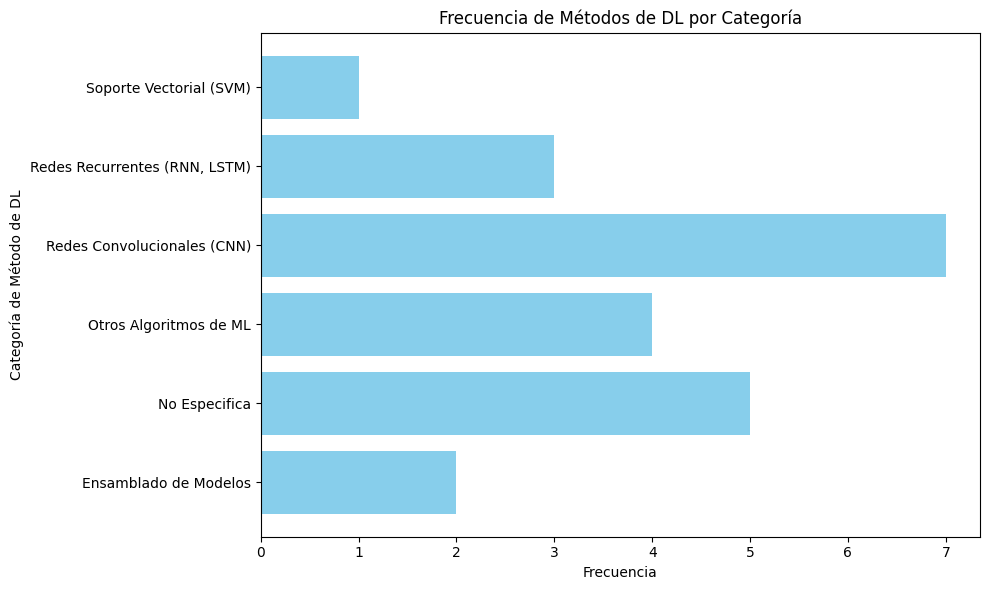

In [27]:
def categorizar_metodo(metodo):
    if 'CNN' in metodo:
        return 'Redes Convolucionales (CNN)'
    elif 'RNN' in metodo or 'LSTM' in metodo:
        return 'Redes Recurrentes (RNN, LSTM)'
    elif 'SVM' in metodo and len(metodo.split(',')) == 1:
        return 'Soporte Vectorial (SVM)'
    elif any(algo in metodo for algo in ['RF', 'KNN', 'DT', 'DA', 'NB']):
        return 'Otros Algoritmos de ML'
    elif 'No especifica' in metodo or 'No reporta' in metodo:
        return 'No Especifica'
    else:
        return 'Ensamblado de Modelos'

# Aplicar la función de clasificación
df_metodos['Categoría'] = df_metodos['Método de DL usado'].apply(categorizar_metodo)

# Contar la frecuencia de cada categoría
df_categorias = df_metodos.groupby('Categoría')['Frecuencia'].sum().reset_index()

# Graficar en forma horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_categorias['Categoría'], df_categorias['Frecuencia'], color='skyblue')
plt.ylabel('Categoría de Método de DL')
plt.xlabel('Frecuencia')
plt.title('Frecuencia de Métodos de DL por Categoría')
plt.tight_layout()
plt.show()


### grafico de barras de herramientas de calculo usadas
1 grafico de barras, ojala con los campos de población ordenados alfabéticamente (columna "Método de DL usado")

<p style="color: red">No entiendo a que te refieres con ojala con los campos de población ordenados alfabéticamente ...</p>

# ahora viene 

## grafico de barras de emociones
aqui probablemente se necesite mas edicion de los datos porque la idea es tener las emociones de a 1 en el grafico para ver cual/es aparecen mas
1 grafico de barras, me vale el orden (columna "Emociones descritas")

In [28]:
# emciones descritas

print(f"dfCommon3db.columns: {dfCommon3db.columns}")

dfCommon3db.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado inicial'],
      dtype='object')


In [29]:
print(f"dfCommon3db['Emociones descritas']: {dfCommon3db['Emociones descritas'].value_counts()}")   

dfCommon3db['Emociones descritas']: Emociones descritas
No especifica                                                                                                                                 7
jovialidad, hostilidad, atención, seguridad en uno mismo, tristeza, miedo, culpa y dos dimensiones generales de afecto positivo y negativo    1
emociones y los sentimientos relacionados con el estrés, la autopercepción y la heteropercepción del estrés                                   1
ira, felicidad, miedo, neutral y tristeza                                                                                                     1
alegría, neutral, tristeza, sorpresa, atencion, calma, desagrado                                                                              1
frustración, el estrés y la felicidad                                                                                                         1
miedo                                                                           

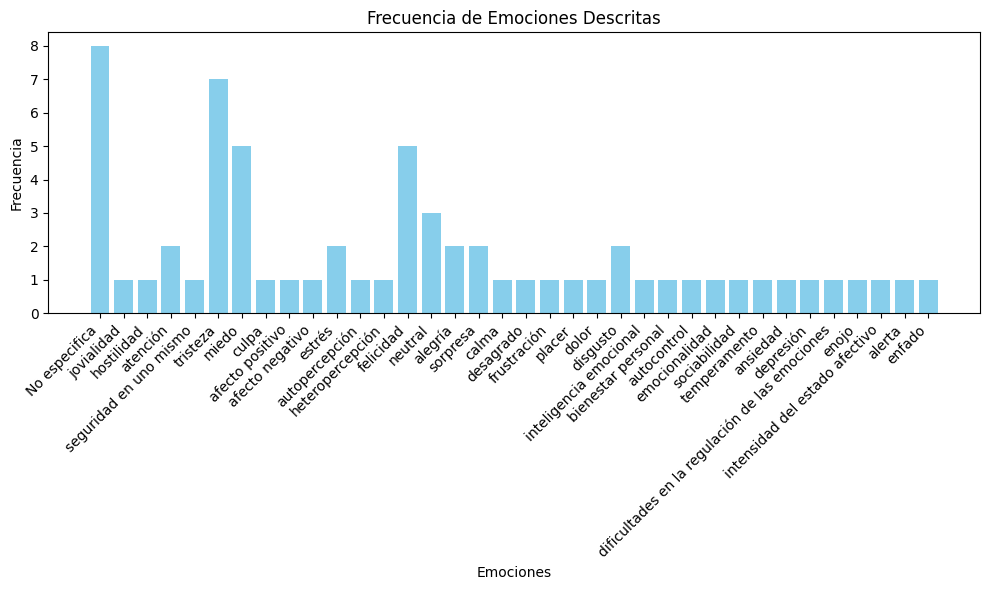

In [31]:
emociones_frecuencia = {
    'No especifica': 8,
    'jovialidad': 1,
    'hostilidad': 1,
    'atención': 2,
    'seguridad en uno mismo': 1,
    'tristeza': 7,
    'miedo': 5,
    'culpa': 1,
    'afecto positivo': 1,
    'afecto negativo': 1,
    'estrés': 2,
    'autopercepción': 1,
    'heteropercepción': 1,
    'felicidad': 5,
    'neutral': 3,
    'alegría': 2,
    'sorpresa': 2,
    'calma': 1,
    'desagrado': 1,
    'frustración': 1,
    'placer': 1,
    'dolor': 1,
    'disgusto': 2,
    'inteligencia emocional': 1,
    'bienestar personal': 1,
    'autocontrol': 1,
    'emocionalidad': 1,
    'sociabilidad': 1,
    'temperamento': 1,
    'ansiedad': 1,
    'depresión': 1,
    'dificultades en la regulación de las emociones': 1,
    'enojo': 1,
    'intensidad del estado afectivo': 1,
    'alerta': 1,
    'enfado': 1,
}

plt.figure(figsize=(10,6))
plt.bar(emociones_frecuencia.keys(), emociones_frecuencia.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Emociones Descritas')
plt.tight_layout()
plt.show()

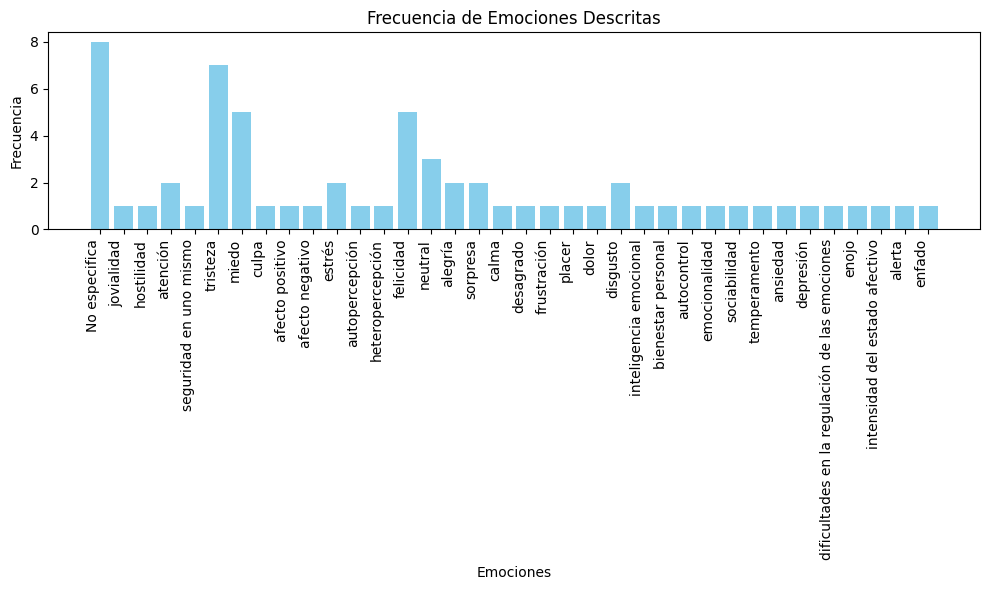

In [32]:
plt.figure(figsize=(10,6))
plt.bar(emociones_frecuencia.keys(), emociones_frecuencia.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Emociones Descritas')
plt.tight_layout()
plt.show()

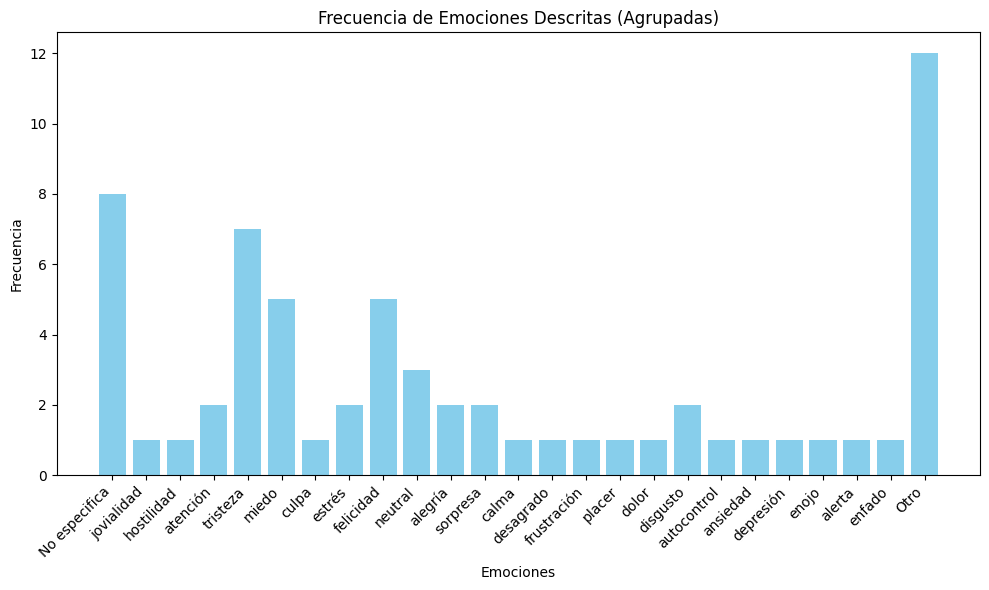

In [ ]:
emociones_agrupadas = {}
otros = 0 

emociones_otro = [
    "inteligencia emocional", "bienestar personal", "dificultades en la regulación de las emociones",
    "intensidad del estado afectivo", "seguridad en uno mismo", "emocionalidad",
    "sociabilidad", "temperamento", "autopercepción", "heteropercepción",
    "afecto positivo", "afecto negativo"
]

for emocion, frecuencia in emociones_frecuencia.items():
    if emocion in emociones_otro:
        otros += frecuencia
    else:
        emociones_agrupadas[emocion] = frecuencia

emociones_agrupadas["Otro"] = otros

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(emociones_agrupadas.keys(), emociones_agrupadas.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Emociones Descritas (Agrupadas)')
plt.tight_layout()
plt.show()

<h3 style="color:red">Sólo cambié la inclinación del label para VARIEDAD :star2:</h3>

## grafico de barras de los tipos de datos
aqui mismo caso anterior, probablemente se necesite mas edicion de los datos porque la idea es tener cada tipo por separado
1 grafico de barras, me vale el orden (columna "Datos emocionales usados (facial, voz, texto)")

In [35]:
# tipos de datos

print(f"dfCommon3db.columns: {dfCommon3db.columns}")

dfCommon3db.columns: Index(['Title', 'Authors', 'Publication Year', 'DOI', 'DB',
       'Población estudiada', 'Método de DL usado',
       'Datos emocionales usados (facial, voz, texto)', 'Emociones descritas',
       'Técnicas de IA utilizadas', 'Base de datos', 'Árbol de emociones',
       'Resultados principales', 'Limitaciones', 'Estado inicial'],
      dtype='object')


In [36]:

print(f"['Tipo de datos']: {dfCommon3db['Datos emocionales usados (facial, voz, texto)']}")

['Tipo de datos']: 1            Actigrafía, Autoinformes de Afecto        
2     Fisiológicos (Movimiento corporal, Expresiones...
3     Video (movimientos corporales, puntos faciales...
4     Video (segmentado en fotogramas, mapas de aten...
5               imágenes, vídeos y señales fisiológicas
6                                                 Audio
7     Imagenes (expresiones faciales) y Fisiológicos...
8                    Audio y Fisiológicos (biometricos)
9                  Fisiológicos (ECG, GSR, SKT)        
10    Texto, Audio, Video y Fisiológicos (ondas cere...
11                 Video (expresiones faciales)        
12     Imágenes (rostros humanos, expresiones faciales)
13                           Fisiológicos (biometricos)
14              Texto (Encuestas, Escalas psicológicas)
15                                   Imágenes y videos 
16                                                Audio
17           Medidas de atención, variables ambientales
18    Fisiológicos (respuesta

In [39]:
data_types = {
    "Texto": [
        "Texto, Audio, Video y Fisiológicos (ondas cere... -4",
        "Texto (Encuestas, Escalas psicológicas)",
        
    ],
    "Audio": [
        "Audio (voz)",
        "Audio y Fisiológicos (biometricos) -3",
        "Texto, Audio, Video y Fisiológicos (ondas cere... -4",
        "Audio",
        "Audio",
    ],
    "Video": [
        "Video (movimientos corporales, puntos faciales...)",
        "Video (segmentado en fotogramas, mapas de aten...)",
        "imágenes, vídeos y señales fisiológicas -1 ",
        "Texto, Audio, Video y Fisiológicos (ondas cere... -4",
        "Video (expresiones faciales)",
        "Imágenes y videos -5",
    ],
    "Imagén": [
        "imágenes, vídeos y señales fisiológicas -1",
        "Imagenes (expresiones faciales) y Fisiológicos... -2",
        "Imágenes (rostros humanos, expresiones faciales)",
        "Imágenes y videos -5",
        "Imagen",
        "Imagen",
    ],
    "Fisiologicos": [
        "imágenes, vídeos y señales fisiológicas -1 ",
        "Fisiológicos (Movimiento corporal, Expresiones...)",
        "Imagenes (expresiones faciales) y Fisiológicos... -2",
        "Audio y Fisiológicos (biometricos) -3",
        "Fisiológicos (ECG, GSR, SKT)",
        "Texto, Audio, Video y Fisiológicos (ondas cere... -4",
        "Fisiológicos (biometricos)",
        "Fisiológicos (respuestas en condiciones neutra...",

    ],
    "No especifica": [
        "No especifica",
        "Medidas de atención, variables ambientales"
    ]
}

<h1 style="color: green"> Esto lo hice manual, la unión (un dato que va en más de una categoria lo puse con -1 -2 -3 y así) PORFAVOR REVISAR CORROBORAR</h1>

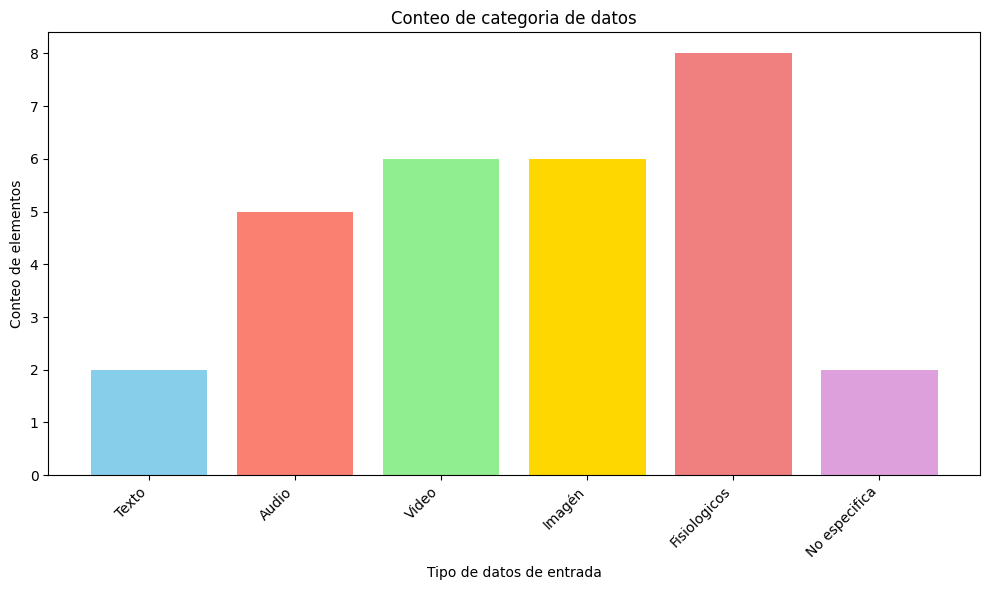

In [43]:
category_counts = {category: len(items) for category, items in data_types.items()}
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'plum']

plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=colors[:len(category_counts)])
plt.xlabel('Tipo de datos de entrada')
plt.ylabel('Conteo de elementos')
plt.title('Conteo de categoria de datos')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()